# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# nsteps = 0
# while True:
#     nsteps += 1
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
# #     print(actions[0])
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score over {} steps (averaged over agents) this episode: {}'.format(nsteps, np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from ddpg_agent import Agent

agent = Agent(state_size, action_size, 0, num_agents)

using device: cuda:0


In [7]:
import torch
from collections import deque

def train(n_episodes=500, max_t=1000, train=True):
    scores_deque = deque(maxlen=100)
    scores = []
    avg_scores = []
    episode_scores = []
    solved_in = 0
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=train)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        solved_in += 1
        
        for i in range(max_t):
                actions = agent.act(states)                        
                env_info = env.step(actions)[brain_name]           
                next_states = env_info.vector_observations         
                rewards = env_info.rewards                         
                dones = env_info.local_done                        
                agent.step(states, actions, rewards, next_states, dones)
                score += rewards                                   
                states = next_states                               
                if np.any(dones):                                  
                    break 
        episode_score = np.mean(score)
        scores_deque.append(episode_score)
        avg_score = np.mean(scores_deque)
        avg_scores.append(avg_score)
        episode_scores.append(episode_score)
        
        print('\nEpisode {}\tEpisode Score: {:.3f}\tAverage Score: {:.3f}'.format(i_episode, episode_score, avg_score), end="")
        
        if avg_score > 30 and solved_in == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            solved_in = i
    print('\nEnvironment solved in {:d} episodes!'.format(solved_in))
    return avg_scores, episode_scores



In [8]:
avg_scores, episode_scores = train()


Episode 1	Episode Score: 0.986	Average Score: 0.986
Episode 2	Episode Score: 3.909	Average Score: 2.448
Episode 3	Episode Score: 7.311	Average Score: 4.069
Episode 4	Episode Score: 9.155	Average Score: 5.340
Episode 5	Episode Score: 10.227	Average Score: 6.318
Episode 6	Episode Score: 8.226	Average Score: 6.636
Episode 7	Episode Score: 4.640	Average Score: 6.351
Episode 8	Episode Score: 1.744	Average Score: 5.775
Episode 9	Episode Score: 1.913	Average Score: 5.346
Episode 10	Episode Score: 1.738	Average Score: 4.985
Episode 11	Episode Score: 1.859	Average Score: 4.701
Episode 12	Episode Score: 1.459	Average Score: 4.431
Episode 13	Episode Score: 2.616	Average Score: 4.291
Episode 14	Episode Score: 1.361	Average Score: 4.082
Episode 15	Episode Score: 2.035	Average Score: 3.946
Episode 16	Episode Score: 1.635	Average Score: 3.801
Episode 17	Episode Score: 1.014	Average Score: 3.637
Episode 18	Episode Score: 1.077	Average Score: 3.495
Episode 19	Episode Score: 1.305	Average Score: 3.380


Episode 154	Episode Score: 0.688	Average Score: 0.693
Episode 155	Episode Score: 0.726	Average Score: 0.691
Episode 156	Episode Score: 0.479	Average Score: 0.687
Episode 157	Episode Score: 0.457	Average Score: 0.684
Episode 158	Episode Score: 0.649	Average Score: 0.686
Episode 159	Episode Score: 0.588	Average Score: 0.685
Episode 160	Episode Score: 0.521	Average Score: 0.686
Episode 161	Episode Score: 0.752	Average Score: 0.686
Episode 162	Episode Score: 0.653	Average Score: 0.687
Episode 163	Episode Score: 0.542	Average Score: 0.688
Episode 164	Episode Score: 0.611	Average Score: 0.687
Episode 165	Episode Score: 0.446	Average Score: 0.685
Episode 166	Episode Score: 0.668	Average Score: 0.686
Episode 167	Episode Score: 0.614	Average Score: 0.687
Episode 168	Episode Score: 0.438	Average Score: 0.686
Episode 169	Episode Score: 0.539	Average Score: 0.686
Episode 170	Episode Score: 0.426	Average Score: 0.684
Episode 171	Episode Score: 0.658	Average Score: 0.685
Episode 172	Episode Score: 0

Episode 305	Episode Score: 0.593	Average Score: 0.570
Episode 306	Episode Score: 0.553	Average Score: 0.571
Episode 307	Episode Score: 0.609	Average Score: 0.571
Episode 308	Episode Score: 0.549	Average Score: 0.571
Episode 309	Episode Score: 0.501	Average Score: 0.570
Episode 310	Episode Score: 0.566	Average Score: 0.572
Episode 311	Episode Score: 0.534	Average Score: 0.572
Episode 312	Episode Score: 0.527	Average Score: 0.571
Episode 313	Episode Score: 0.536	Average Score: 0.570
Episode 314	Episode Score: 0.539	Average Score: 0.570
Episode 315	Episode Score: 0.640	Average Score: 0.571
Episode 316	Episode Score: 0.498	Average Score: 0.569
Episode 317	Episode Score: 0.592	Average Score: 0.570
Episode 318	Episode Score: 0.594	Average Score: 0.571
Episode 319	Episode Score: 0.574	Average Score: 0.570
Episode 320	Episode Score: 0.579	Average Score: 0.571
Episode 321	Episode Score: 0.515	Average Score: 0.570
Episode 322	Episode Score: 0.577	Average Score: 0.570
Episode 323	Episode Score: 0

Episode 456	Episode Score: 0.646	Average Score: 0.593
Episode 457	Episode Score: 0.484	Average Score: 0.591
Episode 458	Episode Score: 0.574	Average Score: 0.592
Episode 459	Episode Score: 0.667	Average Score: 0.593
Episode 460	Episode Score: 0.569	Average Score: 0.594
Episode 461	Episode Score: 0.584	Average Score: 0.594
Episode 462	Episode Score: 0.442	Average Score: 0.592
Episode 463	Episode Score: 0.588	Average Score: 0.592
Episode 464	Episode Score: 0.590	Average Score: 0.591
Episode 465	Episode Score: 0.628	Average Score: 0.591
Episode 466	Episode Score: 0.574	Average Score: 0.591
Episode 467	Episode Score: 0.586	Average Score: 0.591
Episode 468	Episode Score: 0.567	Average Score: 0.591
Episode 469	Episode Score: 0.480	Average Score: 0.589
Episode 470	Episode Score: 0.549	Average Score: 0.587
Episode 471	Episode Score: 0.643	Average Score: 0.589
Episode 472	Episode Score: 0.605	Average Score: 0.588
Episode 473	Episode Score: 0.611	Average Score: 0.590
Episode 474	Episode Score: 0

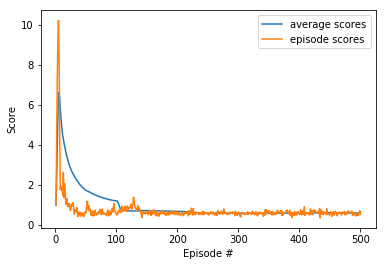

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores) + 1), avg_scores, label="average scores")
plt.plot(np.arange(1, len(episode_scores) + 1), episode_scores, label="episode scores")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()
fig.savefig("scores.png")

### 2. Watch a smart agent!


In [10]:
# load the weights from file

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)                  # get an action (for each agent)
    env_info = env.step(actions)[brain_name] # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.5019999887794256
